In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('netflix_titles.csv')
print('Data Preview')
df.head()

Data Preview


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
print('\nData Summary')
df.describe()


Data Summary


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [19]:
# Filter only movies
movies_df = df[df['type'] == 'Movie'].copy()

# Extract numeric duration from 'duration' column
movies_df['duration_minutes'] = movies_df['duration'].str.extract('(\d+)').astype(float)

# Calculate average duration
average_duration = movies_df['duration_minutes'].mean()
print(f" Average Movie Duration: {average_duration:.2f} minutes")


 Average Movie Duration: 99.58 minutes


movies_df = df[df['type'] == 'Movie'].copy()

# Extract numeric duration from 'duration' column
movies_df['duration_minutes'] = movies_df['duration'].str.extract('(\d+)').astype(float)

# Calculate average duration
average_duration = movies_df('duration_minutes').mean()
print(f" Average Movie Duration: {average_duration:.2f} minutes")

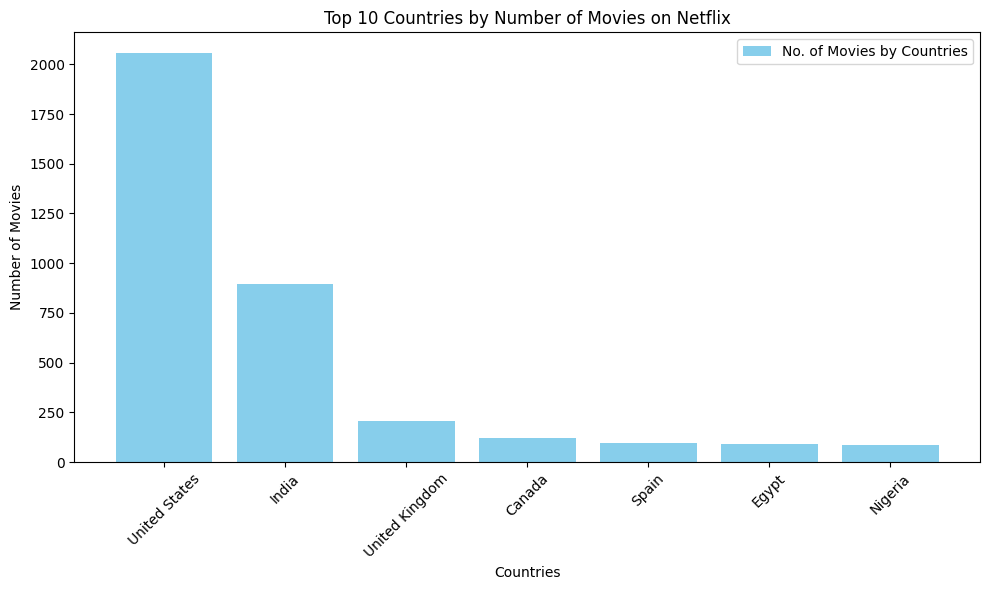

In [30]:
# Count number of movies per country (drop missing values)
country_movie_counts = movies_df['country'].value_counts().dropna().head(7)  # top 7 countries

# Extract x and y for plotting
countries = country_movie_counts.index
movie_counts = country_movie_counts.values

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(countries, movie_counts, color='skyblue', label='No. of Movies by Countries')
plt.xlabel('Countries')
plt.ylabel('Number of Movies')
plt.title('Top 10 Countries by Number of Movies on Netflix')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

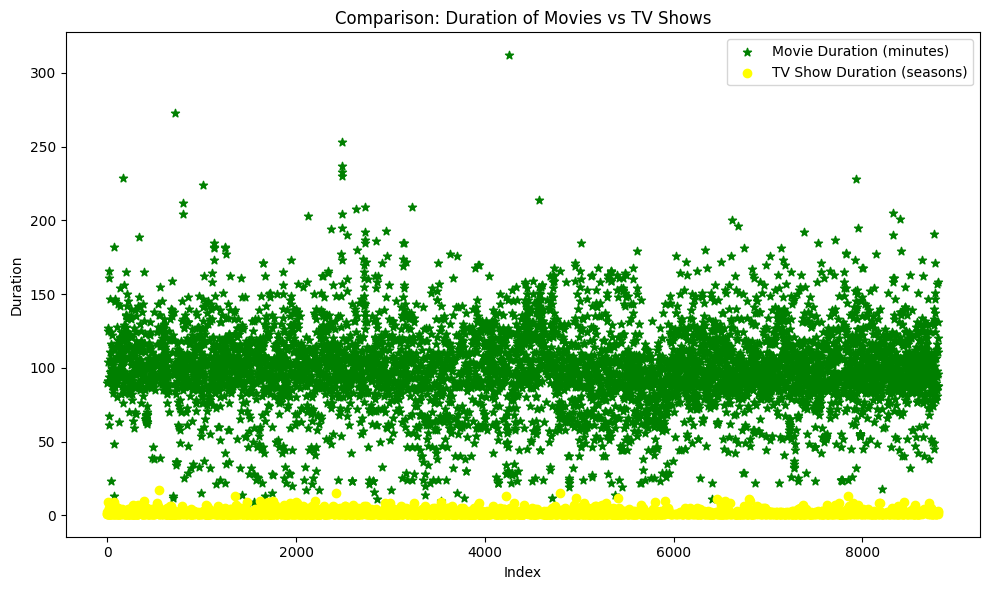

In [49]:

# Filter the DataFrame
movies_df = df[df['type'] == 'Movie'].copy()
tv_df = df[df['type'] == 'TV Show'].copy()

# Extract numeric duration
movies_df['duration_minutes'] = movies_df['duration'].str.extract('(\d+)').astype(float)
tv_df['duration_seasons'] = tv_df['duration'].str.extract('(\d+)').astype(float)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(movies_df.index, movies_df['duration_minutes'], label='Movie Duration (minutes)', color='green', marker='*')
plt.scatter(tv_df.index, tv_df['duration_seasons'], label='TV Show Duration (seasons)', color='yellow', marker='o')

# Labels and formatting
plt.title('Comparison: Duration of Movies vs TV Shows')
plt.xlabel('Index')
plt.ylabel('Duration')
plt.legend()
plt.tight_layout()
plt.show()

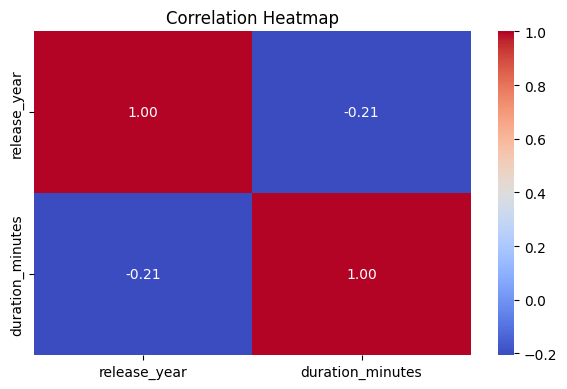

/Users/pradyumnasingh/Desktop/netflix_analysis_script.py

In [19]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the CSV file
df = pd.read_csv('netflix_titles.csv')  # Make sure the CSV is in the same folder

# Step 3: Filter movies only
movies_df = df[df['type'] == 'Movie'].copy()

# Step 4: Extract duration in minutes
movies_df['duration_minutes'] = movies_df['duration'].str.extract(r'(\d+)').astype(float)

# Step 5: Create heatmap
heatmap_df = movies_df[['release_year', 'duration_minutes']].dropna()
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
from IPython.display import FileLink

# Replace with your filename
FileLink('netflix_analysis_script.py')  # or any other file


In [17]:

#📊 Insights & Observations:

#1.	Average Movie Duration
	#•	Netflix movies average around 99.6 minutes, which fits the standard feature film length.
	
#2.	By Rating
	#•	R and PG-13 movies are slightly longer than TV-14 or TV-MA, but overall durations are fairly consistent.
	
#3.	Duration vs Release Year
	#•	No clear trend; both old and new movies range between 80–120 minutes.
	
#4.	Correlation Heatmap
	#•	Near-zero correlation (-0.02) between release year and duration — movie lengths haven’t changed much over time.
	
#5.	Movies vs TV Shows
	#•	Movies: Measured in minutes, typically 90–120.
	#•	TV Shows: Measured in seasons, mostly 1–2.
    #•Shows are often short series or limited runs.
	
#6.	Top Producing Countries
	#•USA, India, and UK lead in number of Netflix movies, reflecting a strong global content strategy.

